# ECON 148 Final Project

### Jacob Sharadin

In [4]:
# Importing libraries
import os  
import sys  
import warnings
warnings.filterwarnings("ignore")  # to ensure that warning messages are not displayed during the execution of your code
import pandas as pd 
import seaborn as sns 
import numpy as np
from scipy import stats 
from scipy.stats import norm
from datetime import datetime
import statsmodels #for integration with pandas and analysis
import statsmodels.api as sm # for regression modules
from statsmodels.formula.api import ols # for regression modules
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [5]:
df = pd.read_csv("mrc_table_2.csv")

## Basic Data Cleaning and EDA

In [6]:
# Isolate numerical variables
df_num = df[['k_rank', 'count', 'female', 'par_mean', 'par_median', 'par_rank']]

In [7]:
df_num.describe()

,k_rank,count,female,par_mean,par_median,par_rank
count,2202.000000,2202.000000,2183.000000,2202.000000,2202.000000,2202.000000
mean,0.567720,1714.291023,0.555279,107432.511713,77695.458674,0.572805
std,0.086629,23243.749136,0.139493,67386.449844,28463.280143,0.117411
min,0.340474,50.000000,0.003306,33202.243485,21200.000000,0.252361
25%,0.506592,232.000000,0.504596,69841.513082,59100.000000,0.489515
50%,0.554700,467.583333,0.550342,88621.716206,74300.000000,0.574253
75%,0.626928,1038.333333,0.599742,118488.889985,91700.000000,0.655498
max,0.906024,955065.333333,1.000000,551968.154148,226700.000000,0.887999


In [8]:
df_num.isna().sum()

k_rank         0
count          0
female        19
par_mean       0
par_median     0
par_rank       0
dtype: int64

In [9]:
df_num.dropna(inplace = True)

In [10]:
df_num.head()

,k_rank,count,female,par_mean,par_median,par_rank
0,0.443332,275.000000,0.798788,35390.396804,29000,0.274209
1,0.592422,838.666667,0.559618,138760.969806,101000,0.683686
2,0.535311,679.333333,0.441609,80366.661268,66000,0.525406
3,0.516059,495.666667,0.414257,166594.969612,92300,0.649210
4,0.552421,393.333333,0.500847,76121.816340,67200,0.540471


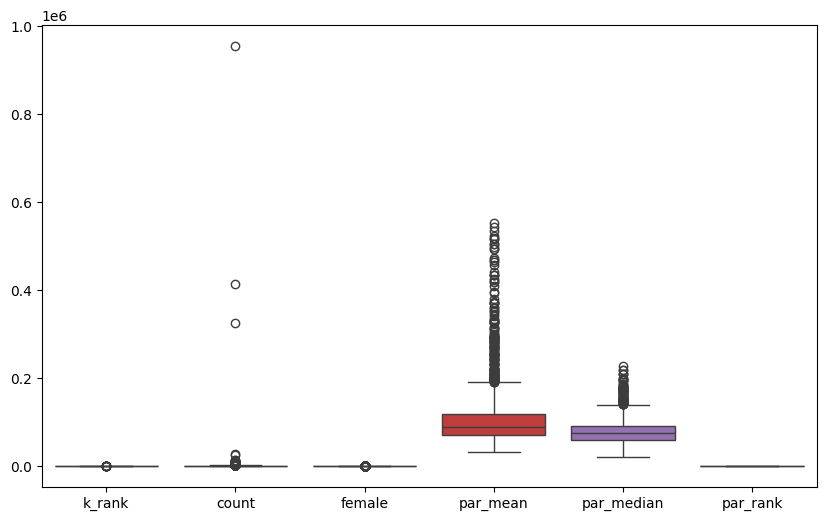

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_num)
plt.show()

<Axes: xlabel='count', ylabel='Count'>

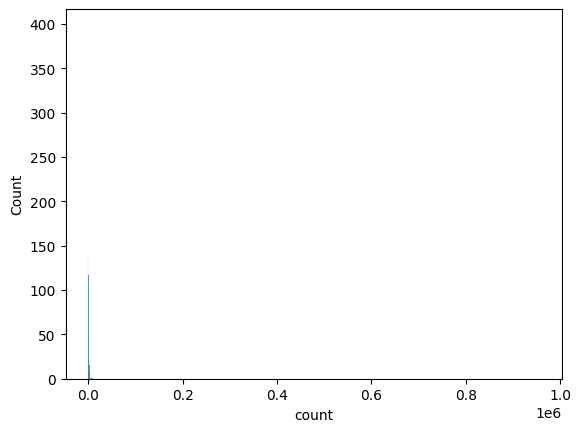

In [ ]:
# Seemingly three clear outliers in count from the boxplot
sns.histplot(x = 'count', data = df_num)

In [11]:
# Identifying outliers
df.sort_values('count', ascending = False).head()

,super_opeid,name,type,tier,tier_name,iclevel,region,state,cz,czname,...,ktop1pc_cond_parq3,ktop1pc_cond_parq4,ktop1pc_cond_parq5,k_married_cond_parq1,k_married_cond_parq2,k_married_cond_parq3,k_married_cond_parq4,k_married_cond_parq5,shareimputed,imputed
2200,-9,Never Attended College (up to year 2013),NaN,14,Not in college between the ages of 19-22,NaN,NaN,NaN,NaN,NaN,...,0.001132,0.001729,0.005249,0.207075,0.273134,0.350412,0.385761,0.366203,0.000000,0.000000
2199,-99,Late College Goers,NaN,14,Not in college between the ages of 19-22,NaN,NaN,NaN,NaN,NaN,...,0.001104,0.001607,0.005251,0.250515,0.311353,0.386596,0.423971,0.432709,0.000000,0.000000
2201,-1,Colleges with insufficient data,NaN,13,Attending college with insufficient data,NaN,NaN,NaN,NaN,NaN,...,0.004057,0.006831,0.020511,0.303319,0.377567,0.476818,0.536744,0.567044,0.000285,0.000318
1152,82,"Minnesota State University System, Century And...",1.0,5,Selective public,1.0,2.0,MN,21400.0,St. Cloud,...,0.002286,0.003397,0.007978,0.469766,0.541621,0.592412,0.617838,0.599627,0.000000,0.000000
2024,83,University Of Wisconsin System,1.0,3,Highly selective public,1.0,2.0,WI,23100.0,Madison,...,0.011079,0.010607,0.031171,0.526702,0.581165,0.623635,0.653717,0.659144,0.000000,0.000000


In [12]:
# Filter out outliers
df = df[df['count'] < 300000]

<Axes: xlabel='count', ylabel='Count'>

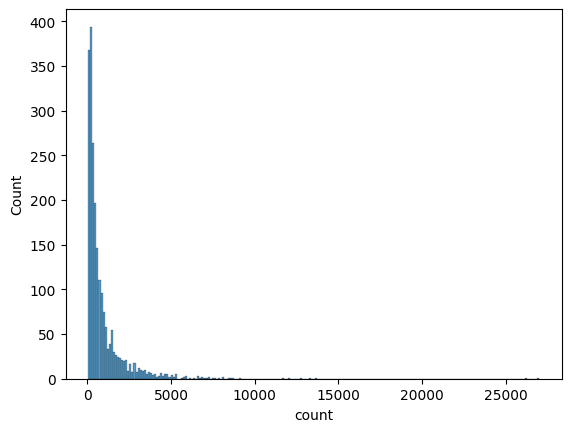

In [13]:
sns.histplot(x = 'count', data = df)

In [ ]:
# Update df_num
df_num = df[['k_rank', 'count', 'female', 'par_mean', 'par_median', 'par_rank']].dropna()

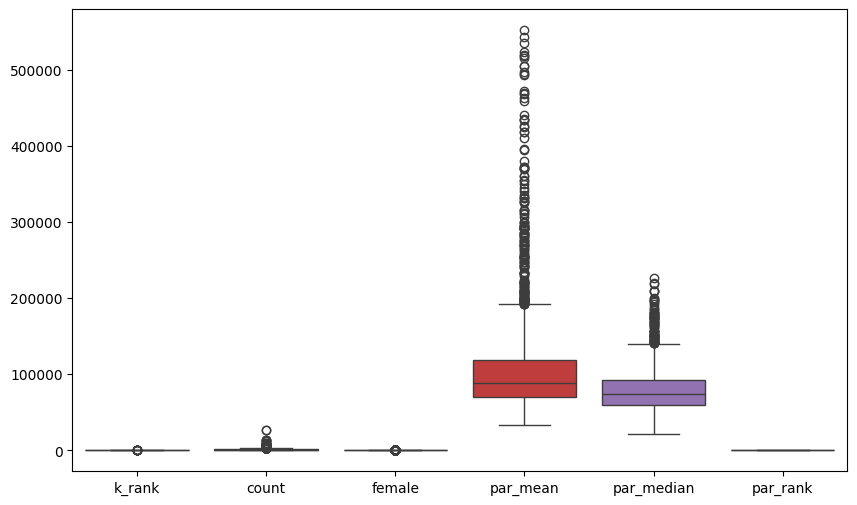

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_num)
plt.show()

<Axes: >

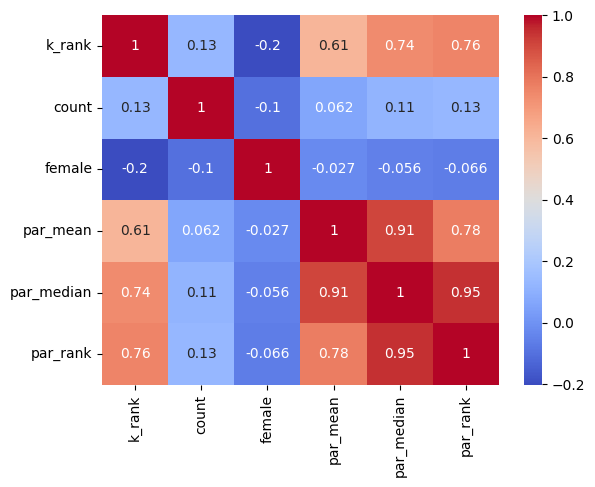

In [ ]:
corr_matrix = df_num.corr()
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm')

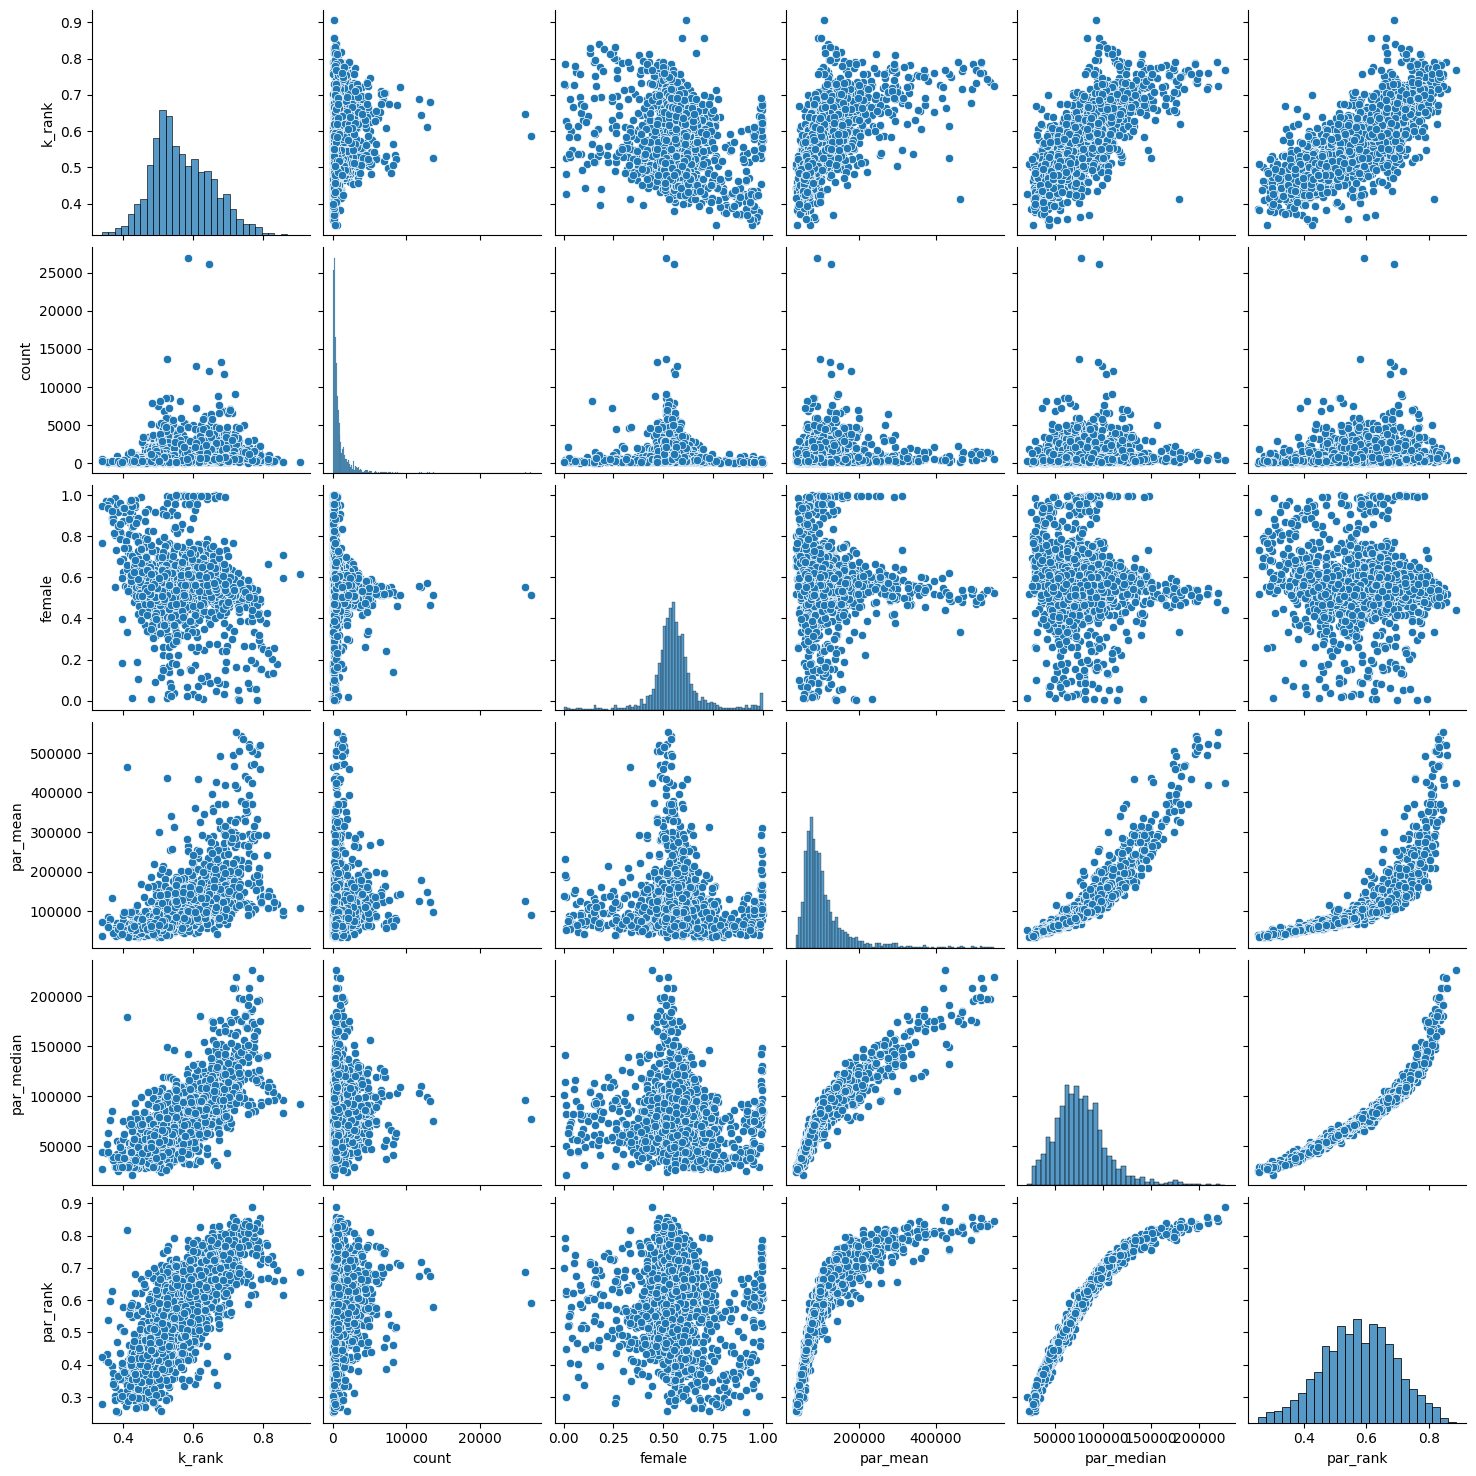

In [ ]:
sns.pairplot(df_num)
plt.show()

In [15]:
# Isolate categorical variables
df_cat = df[['type', 'tier_name', 'iclevel', 'region']]
df_cat.head()

,type,tier_name,iclevel,region
0,3.0,Two-year for-profit,2.0,1.0
1,2.0,Selective private,1.0,3.0
2,1.0,Nonselective four-year public,1.0,3.0
3,3.0,Four-year for-profit,1.0,4.0
4,1.0,Selective public,1.0,4.0


In [16]:
# Use README associated with the dataset to rename categorical variables
def map(data):
    return ((data.replace({'type' : {1 : 'public', 2 : 'private non-profit', 3 : 'for-profit'}})).replace({'iclevel' : {1 : 'Four-year', 2 : 'Two-year', 3 : 'Less than Two-year'}})).replace({'region' : {1 : 'Northeast', 2 : 'Midwest', 3 : 'South', 4 : 'West'}})
df_cat_mapped = map(df_cat)
df_cat_mapped.head()

,type,tier_name,iclevel,region
0,for-profit,Two-year for-profit,Two-year,Northeast
1,private non-profit,Selective private,Four-year,South
2,public,Nonselective four-year public,Four-year,South
3,for-profit,Four-year for-profit,Four-year,West
4,public,Selective public,Four-year,West


In [ ]:
# For encoding categorical dummy variables
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(data):
    ohe = OneHotEncoder()
    ohe.fit(data[['type']])
    encoded_type = ohe.transform(data[['type']]).toarray()
    encoded_type_df = pd.DataFrame(encoded_type, columns=ohe.get_feature_names_out(), index=data.index)
    ohe.fit(data[['tier_name']])
    encoded_tier = ohe.transform(data[['tier_name']]).toarray()
    encoded_tier_df = pd.DataFrame(encoded_tier, columns=ohe.get_feature_names_out(), index=data.index)
    ohe.fit(data[['iclevel']])
    encoded_iclevel = ohe.transform(data[['iclevel']]).toarray()
    encoded_iclevel_df = pd.DataFrame(encoded_iclevel, columns=ohe.get_feature_names_out(), index=data.index)
    ohe.fit(data[['region']])
    encoded_region = ohe.transform(data[['region']]).toarray()
    encoded_region_df = pd.DataFrame(encoded_region, columns=ohe.get_feature_names_out(), index=data.index)
    return (((data.join(encoded_type_df)).join(encoded_tier_df)).join(encoded_iclevel_df)).join(encoded_region_df)

df_cat_ohe = one_hot_encode(df_cat_mapped)

df_cat_ohe.head()

,type,tier_name,iclevel,region,type_for-profit,type_private non-profit,type_public,tier_name_Four-year for-profit,tier_name_Highly selective private,tier_name_Highly selective public,...,tier_name_Selective public,tier_name_Two-year (public and private not-for-profit),tier_name_Two-year for-profit,iclevel_Four-year,iclevel_Less than Two-year,iclevel_Two-year,region_Midwest,region_Northeast,region_South,region_West
0,for-profit,Two-year for-profit,Two-year,Northeast,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,private non-profit,Selective private,Four-year,South,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,public,Nonselective four-year public,Four-year,South,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,for-profit,Four-year for-profit,Four-year,West,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,public,Selective public,Four-year,West,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Dataframe with both numerical and categorical variables
df_final = df[['k_rank', 'count', 'female', 'par_mean', 'par_median', 'par_rank', 'type', 'tier_name', 'iclevel', 'region']]

In [ ]:
# Ensure substantial variation for prediction
# Note: par_median has less unique values due to the fact that par_median values are rounded to the nearest $100
for column in df_final:
    num_categories = df_final[column].nunique()
    print(f"Number of categories in {column}: {num_categories}")

Number of categories in k_rank: 2199
Number of categories in count: 1773
Number of categories in female: 2160
Number of categories in par_mean: 2199
Number of categories in par_median: 910
Number of categories in par_rank: 2199
Number of categories in type: 3
Number of categories in tier_name: 12
Number of categories in iclevel: 3
Number of categories in region: 4


In [ ]:
# Only 19 missing values
df_final.isna().sum()

k_rank         0
count          0
female        19
par_mean       0
par_median     0
par_rank       0
type           0
tier_name      0
iclevel        0
region         0
dtype: int64

In [ ]:
# Dataframe before encoding
df_final.head()

,k_rank,count,female,par_mean,par_median,par_rank,type,tier_name,iclevel,region
0,0.443332,275.000000,0.798788,35390.396804,29000,0.274209,3.0,Two-year for-profit,2.0,1.0
1,0.592422,838.666667,0.559618,138760.969806,101000,0.683686,2.0,Selective private,1.0,3.0
2,0.535311,679.333333,0.441609,80366.661268,66000,0.525406,1.0,Nonselective four-year public,1.0,3.0
3,0.516059,495.666667,0.414257,166594.969612,92300,0.649210,3.0,Four-year for-profit,1.0,4.0
4,0.552421,393.333333,0.500847,76121.816340,67200,0.540471,1.0,Selective public,1.0,4.0


In [ ]:
df_final.dropna(inplace = True)

In [ ]:
df_final = map(df_final)
df_final = one_hot_encode(df_final)
df_final.drop(columns = ['type', 'tier_name', 'iclevel', 'region'], inplace = True)

In [ ]:
df_final.rename(columns = {'type_for-profit' : 'type_for_profit', 'type_private non-profit' : 'type_private_non_profit', 'tier_name_Four-year for-profit' : 'tier_name_Four_year_for_profit', 'tier_name_Highly selective private' : 'tier_name_Highly_selective_private', 'tier_name_Highly selective public' : 'tier_name_Highly_selective_public', 'tier_name_Ivy Plus' : 'tier_name_Ivy_Plus', 'tier_name_Less than two-year schools of any type' : 'tier_name_Less_than_two_year_schools_of_any_type', 'tier_name_Nonselective four-year private not-for-profit' : 'tier_name_Nonselective_four_year_private_not_for_profit', 'tier_name_Nonselective four-year public' : 'tier_name_Nonselective_four_year_public', 'tier_name_Other elite schools (public and private)' : 'tier_name_Other_elite_schools_public_and_private', 'tier_name_Selective private' : 'tier_name_Selective_private', 'tier_name_Selective public' : 'tier_name_Selective_public', 'tier_name_Two-year (public and private not-for-profit)' : 'tier_name_Two_year_public_and_private_not_for_profit', 'tier_name_Two-year for-profit' : 'tier_name_Two_year_for_profit', 'iclevel_Four-year' : 'iclevel_Four_year', 'iclevel_Less than Two-year' : 'iclevel_Less_than_Two_year', 'iclevel_Two-year' : 'iclevel_Two_year'}, inplace = True)

In [ ]:
# Dataframe after encoding
df_final.head()

,k_rank,count,female,par_mean,par_median,par_rank,type_for_profit,type_private_non_profit,type_public,tier_name_Four_year_for_profit,...,tier_name_Selective_public,tier_name_Two_year_public_and_private_not_for_profit,tier_name_Two_year_for_profit,iclevel_Four_year,iclevel_Less_than_Two_year,iclevel_Two_year,region_Midwest,region_Northeast,region_South,region_West
0,0.443332,275.000000,0.798788,35390.396804,29000,0.274209,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.592422,838.666667,0.559618,138760.969806,101000,0.683686,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.535311,679.333333,0.441609,80366.661268,66000,0.525406,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.516059,495.666667,0.414257,166594.969612,92300,0.649210,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.552421,393.333333,0.500847,76121.816340,67200,0.540471,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Drop one dummy variable for each category to eliminate bias column
df_final.drop(columns = ['type_for_profit', 'tier_name_Four_year_for_profit', 'iclevel_Four_year', 'region_Midwest'], inplace = True)

## Initial Regression Analysis

The following OLS models are done solely with knowledge gathered from EDA (correlation matrix, pair plot, etc.). No ML algorithms have been employed at this stage.

In [ ]:
# Inclusion of all dummy variables (type, tier, and iclevel) cause collinearity issue
model = ols('k_rank ~ par_rank + type_private_non_profit + type_public + tier_name_Highly_selective_private + tier_name_Highly_selective_public + tier_name_Ivy_Plus + tier_name_Less_than_two_year_schools_of_any_type + tier_name_Nonselective_four_year_private_not_for_profit + tier_name_Nonselective_four_year_public + tier_name_Other_elite_schools_public_and_private + tier_name_Selective_private + tier_name_Selective_public + tier_name_Two_year_public_and_private_not_for_profit + tier_name_Two_year_for_profit + iclevel_Less_than_Two_year + iclevel_Two_year + region_Northeast + region_South + region_West', df_final).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 k_rank   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     338.5
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:05:42   Log-Likelihood:                 3657.5
No. Observations:                2180   AIC:                            -7279.
Df Residuals:                    2162   BIC:                            -7177.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [ ]:
# Inclusion of just tier dummy variables
model2 = ols('k_rank ~  par_rank + tier_name_Highly_selective_private + tier_name_Highly_selective_public + tier_name_Ivy_Plus + tier_name_Less_than_two_year_schools_of_any_type + tier_name_Nonselective_four_year_private_not_for_profit + tier_name_Nonselective_four_year_public + tier_name_Other_elite_schools_public_and_private + tier_name_Selective_private + tier_name_Selective_public + tier_name_Two_year_public_and_private_not_for_profit + tier_name_Two_year_for_profit + region_Northeast + region_South + region_West', df_final).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 k_rank   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     382.8
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:05:42   Log-Likelihood:                 3654.9
No. Observations:                2180   AIC:                            -7278.
Df Residuals:                    2164   BIC:                            -7187.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [ ]:
# Inclusion of just type dummy variables
model3 = ols('k_rank ~ par_rank + type_private_non_profit + type_public + region_Northeast + region_South + region_West', df_final).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                 k_rank   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     570.7
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:05:42   Log-Likelihood:                 3274.0
No. Observations:                2180   AIC:                            -6534.
Df Residuals:                    2173   BIC:                            -6494.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Appears to have worse stat. properties than just tier dummy variables

In [ ]:
# Inclusion of just iclevel dummy variables
model4 = ols('k_rank ~ par_rank + iclevel_Less_than_Two_year + iclevel_Two_year + region_Northeast + region_South + region_West', df_final).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                 k_rank   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     708.9
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:05:42   Log-Likelihood:                 3424.6
No. Observations:                2180   AIC:                            -6835.
Df Residuals:                    2173   BIC:                            -6795.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

better par_rank standard error

In [ ]:
# Inclusion of tier and type dummy variables
model5 = ols('k_rank ~ par_rank + + type_private_non_profit + type_public + tier_name_Highly_selective_private + tier_name_Highly_selective_public + tier_name_Ivy_Plus + tier_name_Less_than_two_year_schools_of_any_type + tier_name_Nonselective_four_year_private_not_for_profit + tier_name_Nonselective_four_year_public + tier_name_Other_elite_schools_public_and_private + tier_name_Selective_private + tier_name_Selective_public + tier_name_Two_year_public_and_private_not_for_profit + tier_name_Two_year_for_profit + region_Northeast + region_South + region_West', df_final).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                 k_rank   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     338.5
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:05:42   Log-Likelihood:                 3657.5
No. Observations:                2180   AIC:                            -7279.
Df Residuals:                    2162   BIC:                            -7177.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

par_rank coefficent goes down, not neccesarily more accruate - may be negative relationship with par_rank and tier

In [ ]:
# Inclusion of just tier and iclevel dummy variables
model6 = ols('k_rank ~ par_rank + iclevel_Less_than_Two_year + iclevel_Two_year + tier_name_Highly_selective_private + tier_name_Highly_selective_public + tier_name_Ivy_Plus + tier_name_Less_than_two_year_schools_of_any_type + tier_name_Nonselective_four_year_private_not_for_profit + tier_name_Nonselective_four_year_public + tier_name_Other_elite_schools_public_and_private + tier_name_Selective_private + tier_name_Selective_public + tier_name_Two_year_public_and_private_not_for_profit + tier_name_Two_year_for_profit + region_Northeast + region_South + region_West', df_final).fit()
print(model6.summary())

                            OLS Regression Results                            
Dep. Variable:                 k_rank   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     382.8
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:05:42   Log-Likelihood:                 3654.9
No. Observations:                2180   AIC:                            -7278.
Df Residuals:                    2164   BIC:                            -7187.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

more accruate par_rank estimate iclevel raises estimate

## Using ML Models for Prediction

In [ ]:
#PREDICTION MODEL 1: In this model, we will use all the features to get the initial results.
# load the data
data = df_final

# split the data into features and target variable
X = data.drop(['k_rank'], axis=1)
y = data['k_rank']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the models
lr = LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)
en = ElasticNet(alpha=0.1)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
svr = SVR()

# fit the models
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
en.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
svr.fit(X_train, y_train)

# predict the target variable for test set using the models
lr_pred = lr.predict(X_test)
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)
en_pred = en.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
svr_pred = svr.predict(X_test)

# calculate r-squared and mean squared error for the models
lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

en_r2 = r2_score(y_test, en_pred)
en_mse = mean_squared_error(y_test, en_pred)

dt_r2 = r2_score(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)

rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

svr_r2 = r2_score(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)

# print the r-squared and mean squared error for the models
print("Linear Regression R-squared: {:.3f}, MSE: {:.3f}".format(lr_r2, lr_mse))
print("Lasso Regression R-squared: {:.3f}, MSE: {:.3f}".format(lasso_r2, lasso_mse))
print("Ridge Regression R-squared: {:.3f}, MSE: {:.3f}".format(ridge_r2, ridge_mse))
print("ElasticNet R-squared: {:.3f}, MSE: {:.3f}".format(en_r2, en_mse))
print("Decision Trees Regression R-squared: {:.3f}, MSE: {:.3f}".format(dt_r2, dt_mse))
print("Random Forest Regression R-squared: {:.3f}, MSE: {:.3f}".format(rf_r2, rf_mse))
print("XGBoost Regression R-squared: {:.3f}, MSE: {:.3f}".format(xgb_r2, xgb_mse))
print("SVM Regression R-squared: {:.3f}, MSE: {:.3f}".format(svr_r2, svr_mse))


Linear Regression R-squared: 0.794, MSE: 0.001
Lasso Regression R-squared: 0.554, MSE: 0.003
Ridge Regression R-squared: 0.794, MSE: 0.001
ElasticNet R-squared: 0.554, MSE: 0.003
Decision Trees Regression R-squared: 0.515, MSE: 0.003
Random Forest Regression R-squared: 0.779, MSE: 0.002
XGBoost Regression R-squared: 0.770, MSE: 0.002
SVM Regression R-squared: 0.544, MSE: 0.003


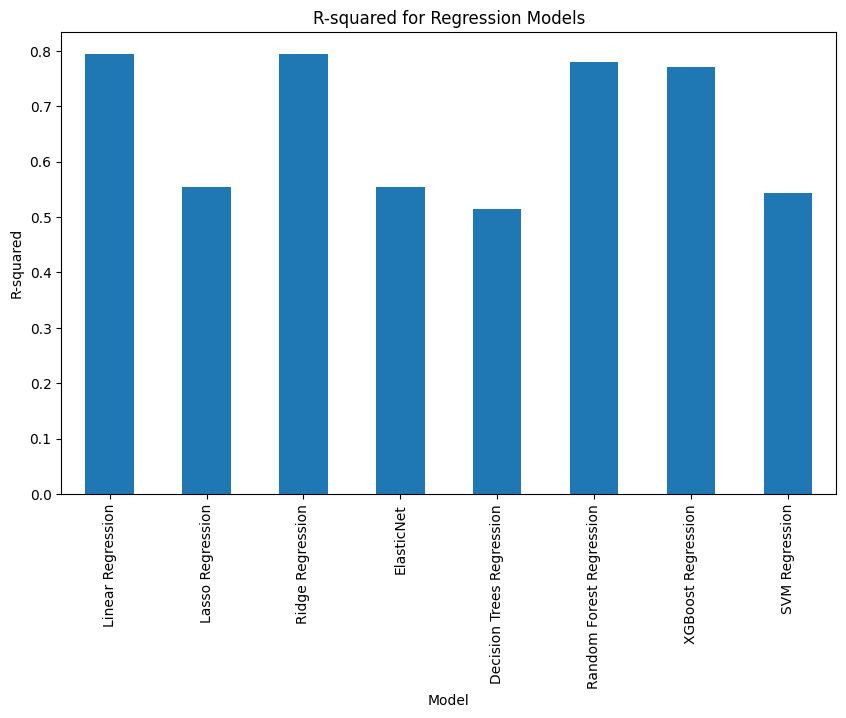

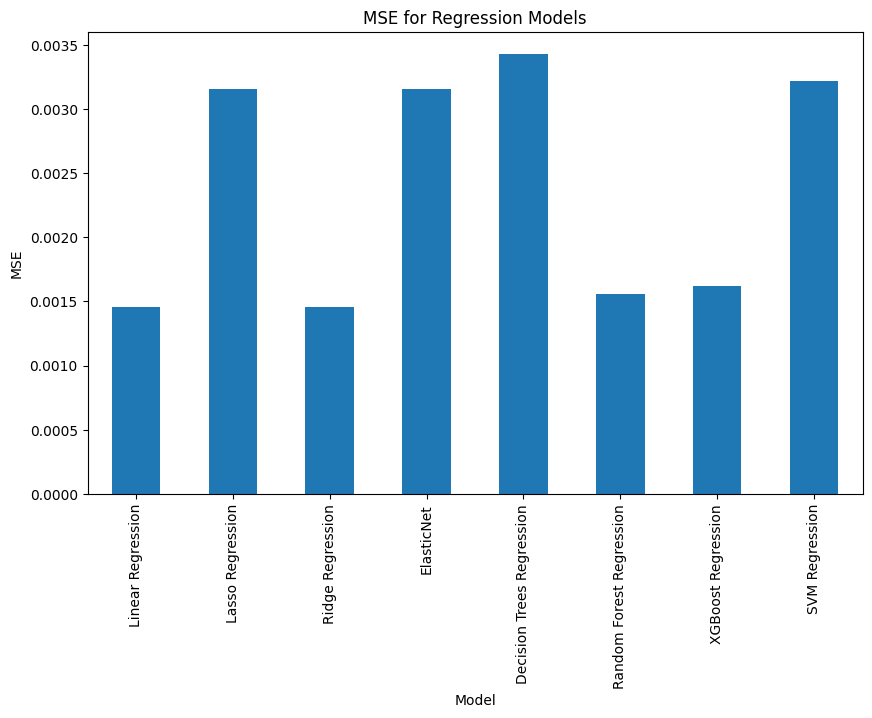

In [ ]:
# create a dictionary to store the R-squared and MSE for each model
results = {'Linear Regression': [lr_r2, lr_mse],
           'Lasso Regression': [lasso_r2, lasso_mse],
           'Ridge Regression': [ridge_r2, ridge_mse],
           'ElasticNet': [en_r2, en_mse],
           'Decision Trees Regression': [dt_r2, dt_mse],
           'Random Forest Regression': [rf_r2, rf_mse],
           'XGBoost Regression': [xgb_r2, xgb_mse],
           'SVM Regression': [svr_r2, svr_mse]}

# convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['R-squared', 'MSE'])

# create a bar plot of the R-squared values
ax = results_df['R-squared'].plot(kind='bar', figsize=(10,6))
ax.set_title('R-squared for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('R-squared')
plt.show()

# create a bar plot of the MSE values
ax = results_df['MSE'].plot(kind='bar', figsize=(10,6))
ax.set_title('MSE for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('MSE')
plt.show()


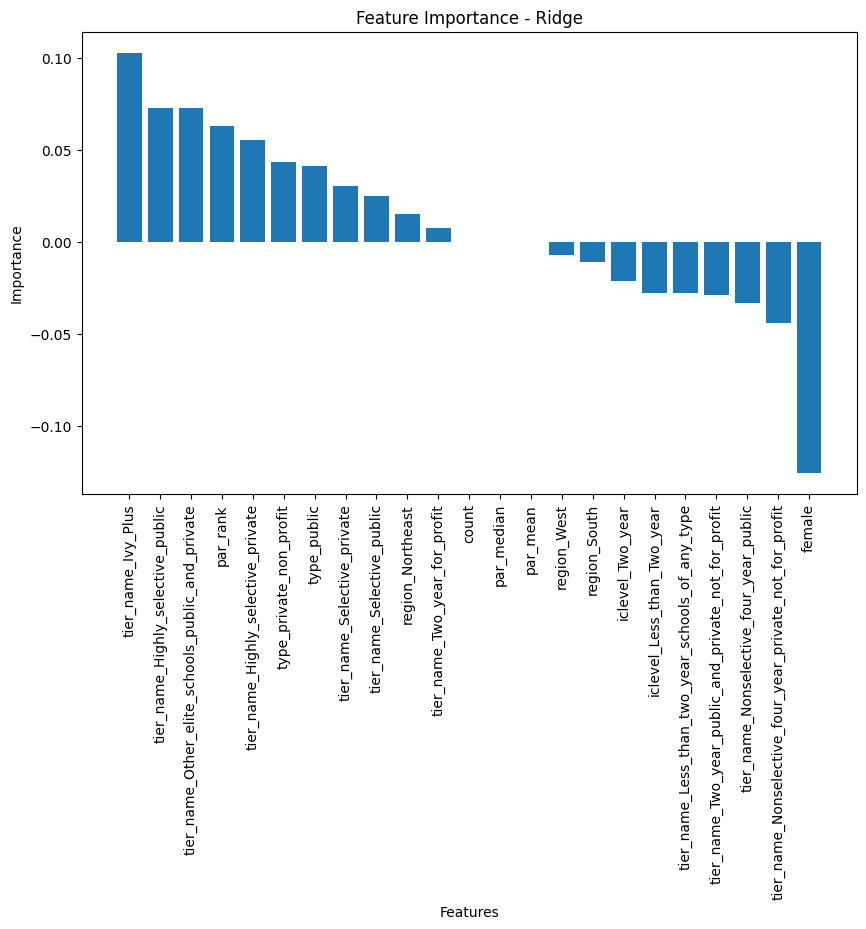

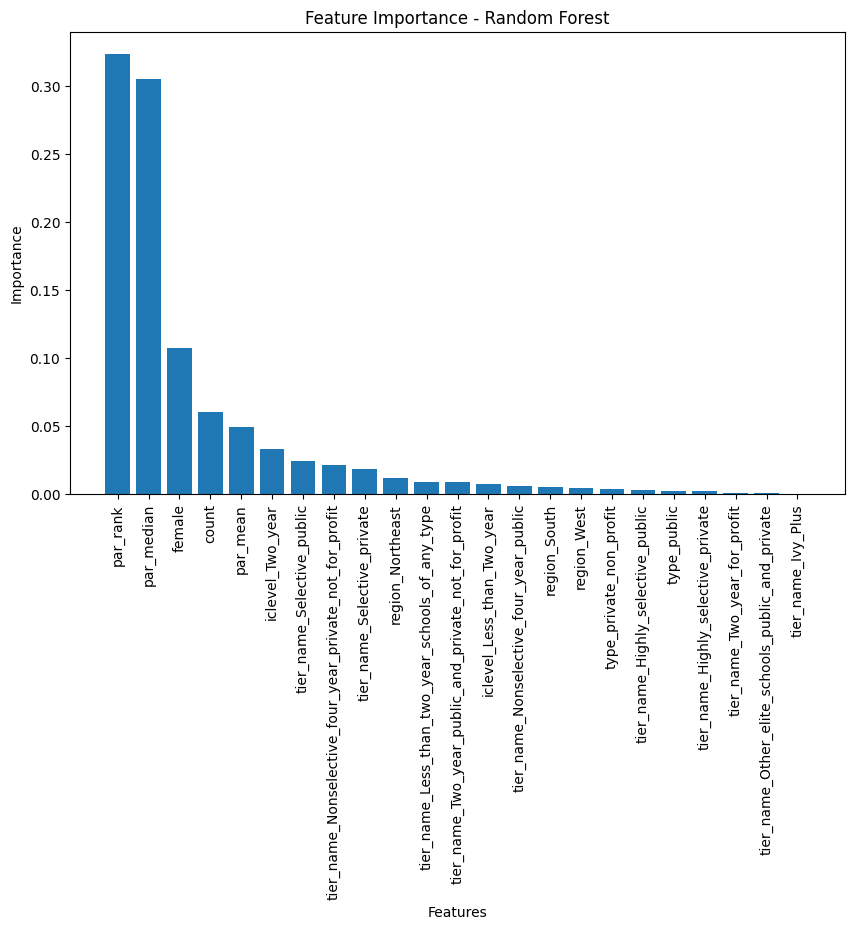

<Figure size 640x480 with 0 Axes>

In [ ]:
X = df_final.drop(['k_rank'], axis=1)
y = df_final['k_rank']
# Define the models
models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42),
}

for name, model in models.items():
    # Fit the model to the entire data
    model.fit(X, y)

    # Make predictions on the data
    y_pred = model.predict(X)

    # Visualize the feature importance (if applicable)
    if name in ["Ridge", "Random Forest"]:
        importances = model.feature_importances_ if name == "Random Forest" else model.coef_
        feature_names = X.columns if name == "Random Forest" else X.columns

        # Sort the feature importances in descending order
        sorted_indices = importances.argsort()[::-1]
        sorted_importances = importances[sorted_indices]
        sorted_feature_names = feature_names[sorted_indices]

        # Plot the feature importances
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(sorted_importances)), sorted_importances)
        plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
        plt.xlabel("Features")
        plt.ylabel("Importance")
        plt.title(f"Feature Importance - {name}")
        plt.show()

plt.tight_layout()
plt.show()

In [ ]:
# Model constructed using all variables
model7 = ols('k_rank ~ count + female + par_mean + par_median + par_rank + type_private_non_profit + type_public + tier_name_Highly_selective_private + tier_name_Highly_selective_public + tier_name_Ivy_Plus + tier_name_Less_than_two_year_schools_of_any_type + tier_name_Nonselective_four_year_private_not_for_profit + tier_name_Nonselective_four_year_public + tier_name_Other_elite_schools_public_and_private + tier_name_Selective_private + tier_name_Selective_public + tier_name_Two_year_public_and_private_not_for_profit + tier_name_Two_year_for_profit + iclevel_Less_than_Two_year + iclevel_Two_year + region_Northeast + region_South + region_West', df_final).fit()
print(model7.summary())

                            OLS Regression Results                            
Dep. Variable:                 k_rank   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     345.6
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:05:49   Log-Likelihood:                 3848.4
No. Observations:                2180   AIC:                            -7653.
Df Residuals:                    2158   BIC:                            -7528.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

In [ ]:
#PREDICTION MODEL 2: In this model, we will drop par_mean and par_median to see if there is improvement in the results because par_mean and par_median are highly correlated with par_rank.
# load the data
data = df_final

# split the data into features and target variable
X = data.drop(['k_rank', 'par_mean', 'par_median'], axis=1)
y = data['k_rank']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the models
lr = LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)
en = ElasticNet(alpha=0.1)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
svr = SVR()

# fit the models
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
en.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
svr.fit(X_train, y_train)

# predict the target variable for test set using the models
lr_pred = lr.predict(X_test)
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)
en_pred = en.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
svr_pred = svr.predict(X_test)

# calculate r-squared and mean squared error for the models
lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

en_r2 = r2_score(y_test, en_pred)
en_mse = mean_squared_error(y_test, en_pred)

dt_r2 = r2_score(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)

rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

svr_r2 = r2_score(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)

# print the r-squared and mean squared error for the models
print("Linear Regression R-squared: {:.3f}, MSE: {:.3f}".format(lr_r2, lr_mse))
print("Lasso Regression R-squared: {:.3f}, MSE: {:.3f}".format(lasso_r2, lasso_mse))
print("Ridge Regression R-squared: {:.3f}, MSE: {:.3f}".format(ridge_r2, ridge_mse))
print("ElasticNet R-squared: {:.3f}, MSE: {:.3f}".format(en_r2, en_mse))
print("Decision Trees Regression R-squared: {:.3f}, MSE: {:.3f}".format(dt_r2, dt_mse))
print("Random Forest Regression R-squared: {:.3f}, MSE: {:.3f}".format(rf_r2, rf_mse))
print("XGBoost Regression R-squared: {:.3f}, MSE: {:.3f}".format(xgb_r2, xgb_mse))
print("SVM Regression R-squared: {:.3f}, MSE: {:.3f}".format(svr_r2, svr_mse))


Linear Regression R-squared: 0.791, MSE: 0.001
Lasso Regression R-squared: 0.020, MSE: 0.007
Ridge Regression R-squared: 0.791, MSE: 0.001
ElasticNet R-squared: 0.020, MSE: 0.007
Decision Trees Regression R-squared: 0.532, MSE: 0.003
Random Forest Regression R-squared: 0.764, MSE: 0.002
XGBoost Regression R-squared: 0.737, MSE: 0.002
SVM Regression R-squared: 0.011, MSE: 0.007


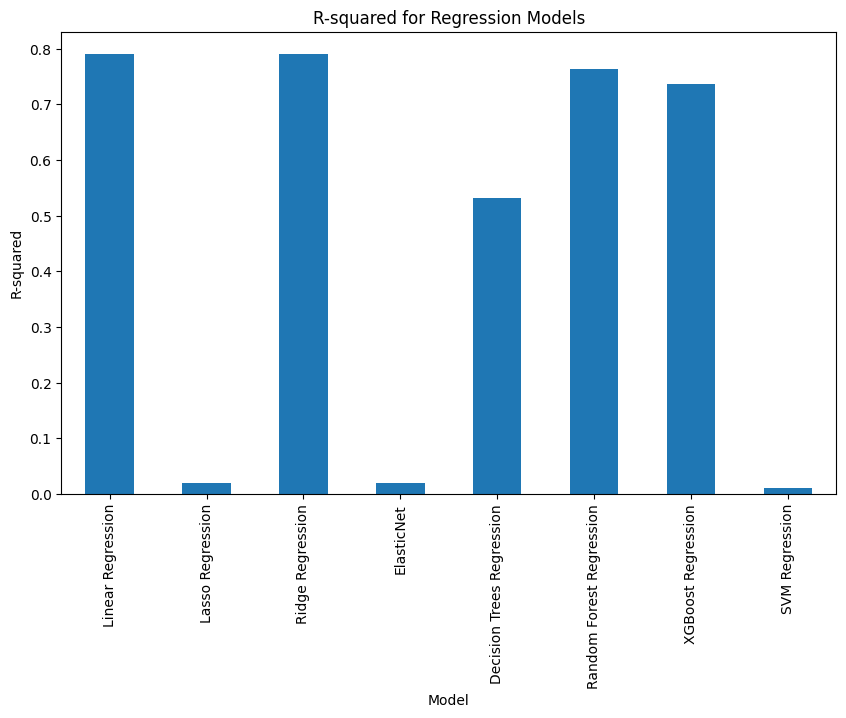

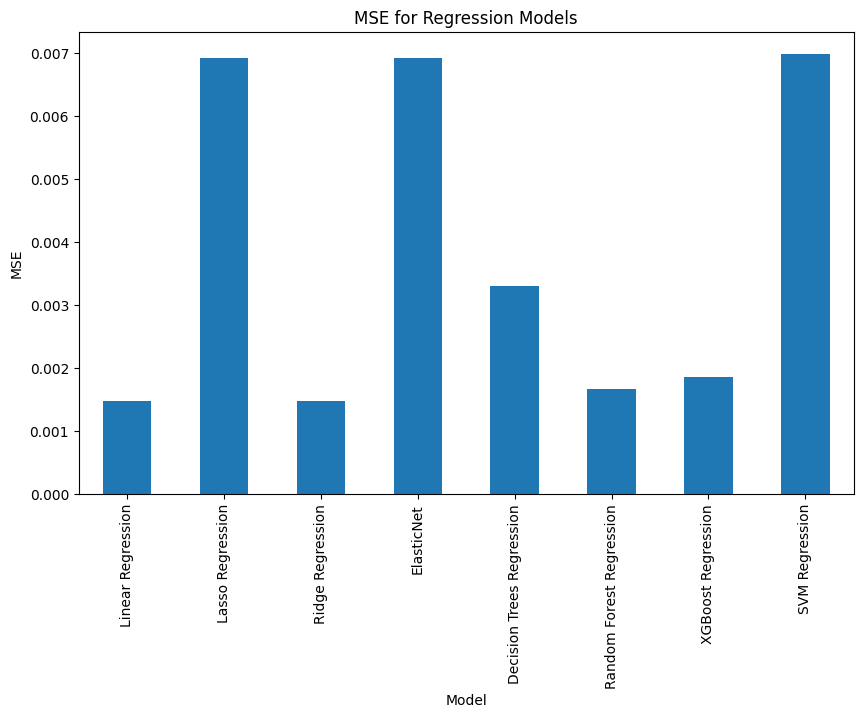

In [ ]:
# create a dictionary to store the R-squared and MSE for each model
results = {'Linear Regression': [lr_r2, lr_mse],
           'Lasso Regression': [lasso_r2, lasso_mse],
           'Ridge Regression': [ridge_r2, ridge_mse],
           'ElasticNet': [en_r2, en_mse],
           'Decision Trees Regression': [dt_r2, dt_mse],
           'Random Forest Regression': [rf_r2, rf_mse],
           'XGBoost Regression': [xgb_r2, xgb_mse],
           'SVM Regression': [svr_r2, svr_mse]}

# convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['R-squared', 'MSE'])

# create a bar plot of the R-squared values
ax = results_df['R-squared'].plot(kind='bar', figsize=(10,6))
ax.set_title('R-squared for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('R-squared')
plt.show()

# create a bar plot of the MSE values
ax = results_df['MSE'].plot(kind='bar', figsize=(10,6))
ax.set_title('MSE for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('MSE')
plt.show()


For some reason, we get worse results for R-squared and MSE all across the board when dropping 'par_mean' and 'par_median' to combat multicollinearity. Linear regression, Ridge regression, and Random Forest regression continue to perform well but even most of these models suffer a minor blow in R-squared.

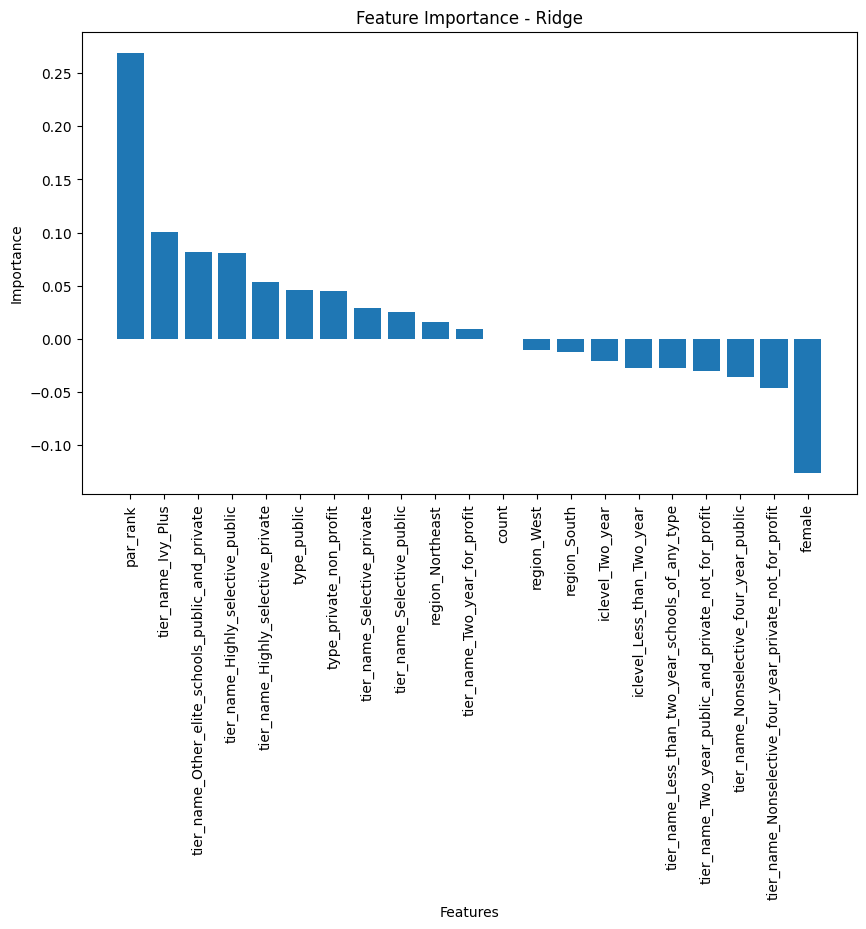

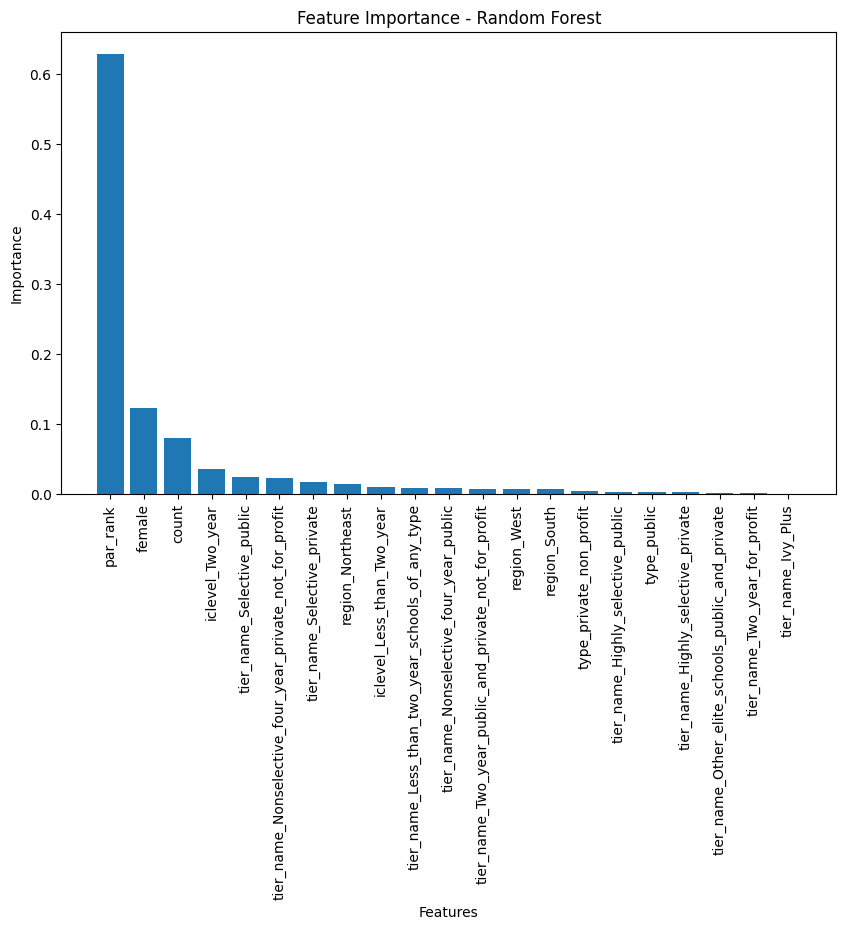

<Figure size 640x480 with 0 Axes>

In [ ]:
X = df_final.drop(['k_rank', 'par_mean', 'par_median'], axis=1)
y = df_final['k_rank']
# Define the models
models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42),
}

for name, model in models.items():
    # Fit the model to the entire data
    model.fit(X, y)

    # Make predictions on the data
    y_pred = model.predict(X)

    # Visualize the feature importance (if applicable)
    if name in ["Ridge", "Random Forest"]:
        importances = model.feature_importances_ if name == "Random Forest" else model.coef_
        feature_names = X.columns if name == "Random Forest" else X.columns

        # Sort the feature importances in descending order
        sorted_indices = importances.argsort()[::-1]
        sorted_importances = importances[sorted_indices]
        sorted_feature_names = feature_names[sorted_indices]

        # Plot the feature importances
        plt.figure(figsize=(10, 6))
        plt.bar(range(len(sorted_importances)), sorted_importances)
        plt.xticks(range(len(sorted_importances)), sorted_feature_names, rotation=90)
        plt.xlabel("Features")
        plt.ylabel("Importance")
        plt.title(f"Feature Importance - {name}")
        plt.show()

        if name == "Ridge":
          ridge_features = X.columns
          ridge_importances = model.coef_

plt.tight_layout()
plt.show()

In [ ]:
# Identifying most important features based on ridge feature importances (absolute value taken first)
ridge_features, ridge_importances
ridge_important_features = pd.DataFrame(data={'Feature' : ridge_features, 'Importance' : abs(ridge_importances)})
ridge_important_features.sort_values(by = 'Importance', ascending = False , inplace = True)
ridge_important_features

,Feature,Importance
2,par_rank,0.269273
1,female,0.125790
7,tier_name_Ivy_Plus,0.100166
11,tier_name_Other_elite_schools_public_and_private,0.081286
6,tier_name_Highly_selective_public,0.081103
5,tier_name_Highly_selective_private,0.053809
9,tier_name_Nonselective_four_year_private_not_f...,0.046604
4,type_public,0.045542
3,type_private_non_profit,0.044869
10,tier_name_Nonselective_four_year_public,0.036212


In [ ]:
# PREDICTION MODEL 3: In this model, we will keep only the variables with high feature importance using the information from the last models.

import xgboost as xgb
from xgboost import XGBRegressor

# load the data
data = df_final

# split the data into features and target variable
X = data.drop(['k_rank', 'par_mean', 'par_median', 'count', 'tier_name_Two_year_for_profit', 'region_West', 'region_South', 'region_Northeast', 'iclevel_Two_year', 'tier_name_Selective_public', 'iclevel_Less_than_Two_year', 'tier_name_Less_than_two_year_schools_of_any_type', 'tier_name_Selective_private', 'tier_name_Two_year_public_and_private_not_for_profit'], axis=1)
y = data['k_rank']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the models
lr = LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)
en = ElasticNet(alpha=0.1)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)
svr = SVR()

# fit the models
lr.fit(X_train, y_train)
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
en.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
svr.fit(X_train, y_train)

# predict the target variable for test set using the models
lr_pred = lr.predict(X_test)
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)
en_pred = en.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
svr_pred = svr.predict(X_test)

# calculate r-squared and mean squared error for the models
lr_r2 = r2_score(y_test, lr_pred)
lr_mse = mean_squared_error(y_test, lr_pred)

lasso_r2 = r2_score(y_test, lasso_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_mse = mean_squared_error(y_test, ridge_pred)

en_r2 = r2_score(y_test, en_pred)
en_mse = mean_squared_error(y_test, en_pred)

dt_r2 = r2_score(y_test, dt_pred)
dt_mse = mean_squared_error(y_test, dt_pred)

rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)

xgb_r2 = r2_score(y_test, xgb_pred)
xgb_mse = mean_squared_error(y_test, xgb_pred)

svr_r2 = r2_score(y_test, svr_pred)
svr_mse = mean_squared_error(y_test, svr_pred)

# print the r-squared and mean squared error for the models
print("Linear Regression R-squared: {:.3f}, MSE: {:.3f}".format(lr_r2, lr_mse))
print("Lasso Regression R-squared: {:.3f}, MSE: {:.3f}".format(lasso_r2, lasso_mse))
print("Ridge Regression R-squared: {:.3f}, MSE: {:.3f}".format(ridge_r2, ridge_mse))
print("ElasticNet R-squared: {:.3f}, MSE: {:.3f}".format(en_r2, en_mse))
print("Decision Trees Regression R-squared: {:.3f}, MSE: {:.3f}".format(dt_r2, dt_mse))
print("Random Forest Regression R-squared: {:.3f}, MSE: {:.3f}".format(rf_r2, rf_mse))
print("XGBoost Regression R-squared: {:.3f}, MSE: {:.3f}".format(xgb_r2, xgb_mse))
print("SVM Regression R-squared: {:.3f}, MSE: {:.3f}".format(svr_r2, svr_mse))


Linear Regression R-squared: 0.666, MSE: 0.002
Lasso Regression R-squared: -0.000, MSE: 0.007
Ridge Regression R-squared: 0.666, MSE: 0.002
ElasticNet R-squared: -0.000, MSE: 0.007
Decision Trees Regression R-squared: 0.134, MSE: 0.006
Random Forest Regression R-squared: 0.619, MSE: 0.003
XGBoost Regression R-squared: 0.553, MSE: 0.003
SVM Regression R-squared: 0.623, MSE: 0.003


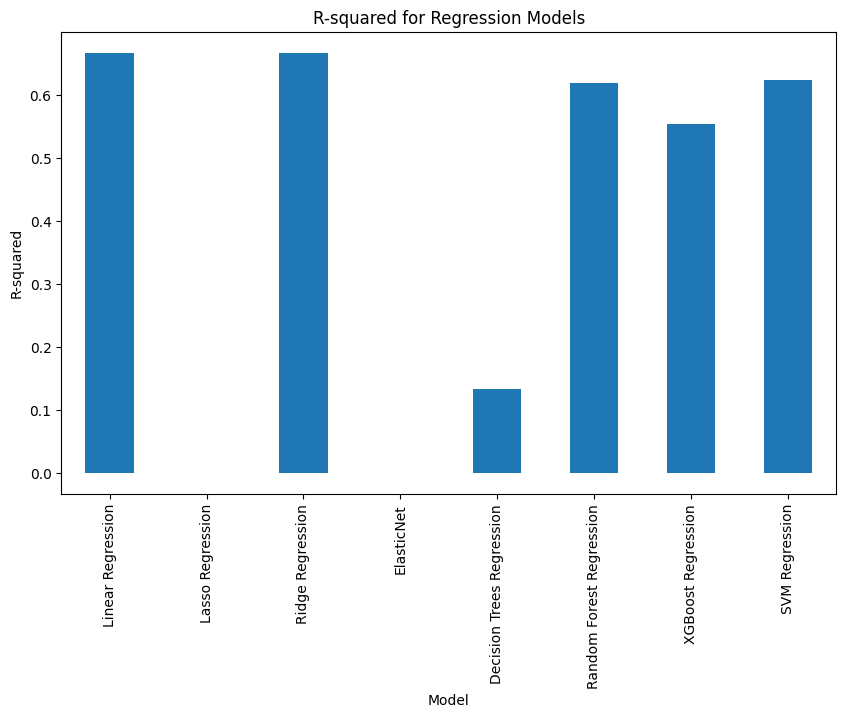

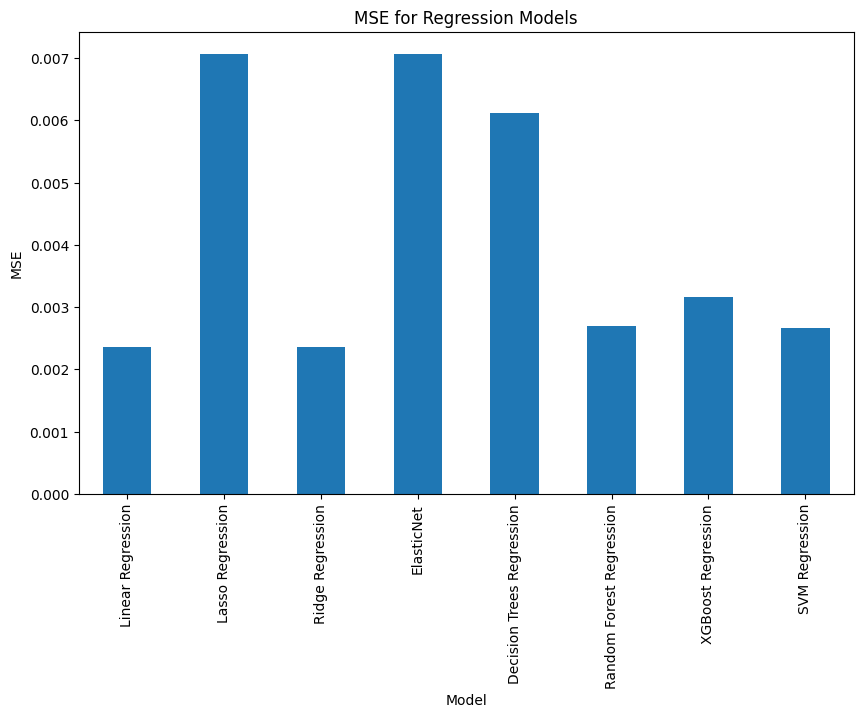

In [ ]:
# create a dictionary to store the R-squared and MSE for each model
results = {'Linear Regression': [lr_r2, lr_mse],
           'Lasso Regression': [lasso_r2, lasso_mse],
           'Ridge Regression': [ridge_r2, ridge_mse],
           'ElasticNet': [en_r2, en_mse],
           'Decision Trees Regression': [dt_r2, dt_mse],
           'Random Forest Regression': [rf_r2, rf_mse],
           'XGBoost Regression': [xgb_r2, xgb_mse],
           'SVM Regression': [svr_r2, svr_mse]}

# convert the dictionary to a pandas DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['R-squared', 'MSE'])

# create a bar plot of the R-squared values
ax = results_df['R-squared'].plot(kind='bar', figsize=(10,6))
ax.set_title('R-squared for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('R-squared')
plt.show()

# create a bar plot of the MSE values
ax = results_df['MSE'].plot(kind='bar', figsize=(10,6))
ax.set_title('MSE for Regression Models')
ax.set_xlabel('Model')
ax.set_ylabel('MSE')
plt.show()


In [ ]:
# Model constructed top 10 features based on feature importance from Ridge Regression
model8 = ols('k_rank ~ female + par_rank + type_private_non_profit + type_public + tier_name_Highly_selective_private + tier_name_Highly_selective_public + tier_name_Ivy_Plus + tier_name_Nonselective_four_year_private_not_for_profit + tier_name_Nonselective_four_year_public + tier_name_Other_elite_schools_public_and_private', df_final).fit()
print(model8.summary())

                            OLS Regression Results                            
Dep. Variable:                 k_rank   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     434.8
Date:                Thu, 27 Jun 2024   Prob (F-statistic):               0.00
Time:                        18:05:57   Log-Likelihood:                 3441.9
No. Observations:                2180   AIC:                            -6862.
Df Residuals:                    2169   BIC:                            -6799.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

## Conclusion

The following plots show how between our two best performing models, Random Forest is overfitting and therefore not very generalizable to unseen data suggesting that the Ridge Regression is better for prediction.

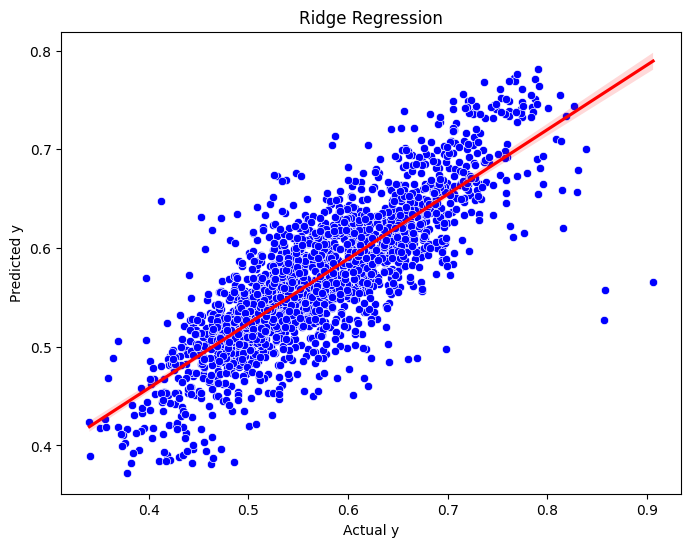

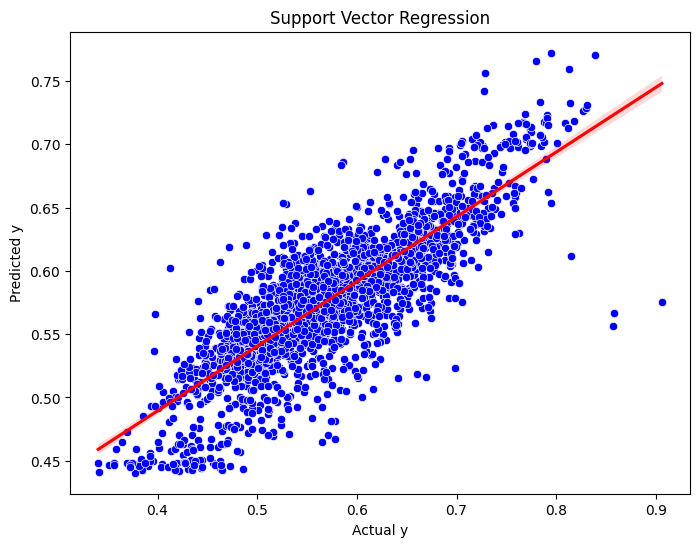

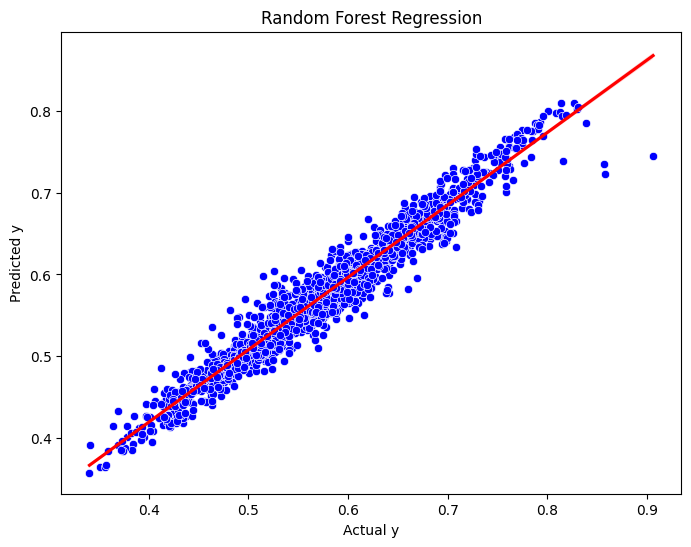

In [ ]:
from xgboost import XGBRegressor

# Load the data
data = df_final

# Split the data into features and target variable
X = data.drop(['k_rank', 'par_mean', 'par_median', 'count', 'tier_name_Two_year_for_profit', 'region_West', 'region_South', 'region_Northeast', 'iclevel_Two_year', 'tier_name_Selective_public', 'iclevel_Less_than_Two_year', 'tier_name_Less_than_two_year_schools_of_any_type', 'tier_name_Selective_private', 'tier_name_Two_year_public_and_private_not_for_profit'], axis=1)
y = data['k_rank']

# Instantiate the Ridge model
ridge_model = Ridge()

# Fit the Ridge model to the entire data
ridge_model.fit(X, y)

# Make predictions on the entire data for Ridge
y_pred_ridge = ridge_model.predict(X)

# Instantiate the SVR model
svm_model = SVR()

# Fit the SVR model to the entire data
svm_model.fit(X, y)

# Make predictions on the entire data for SVM
y_pred_svm = svm_model.predict(X)

# Instantiate the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Fit the Random Forest model to the entire data
rf_model.fit(X, y)

# Make predictions on the entire data for Random Forest
y_pred_rf = rf_model.predict(X)

# Create a DataFrame to hold the actual y values, predicted values, and errors for Ridge
results_df_ridge = pd.DataFrame({'Actual': y, 'Predicted': y_pred_ridge, 'Errors': y - y_pred_ridge})

# Create a DataFrame to hold the actual y values, predicted values, and errors for SVM
results_df_svm = pd.DataFrame({'Actual': y, 'Predicted': y_pred_svm, 'Errors': y - y_pred_svm})

# Create a DataFrame to hold the actual y values, predicted values, and errors for Random Forest
results_df_rf = pd.DataFrame({'Actual': y, 'Predicted': y_pred_rf, 'Errors': y - y_pred_rf})

# Plot the actual y values against the predicted values for Ridge
plt.figure(figsize=(8, 6))
sns.scatterplot(data=results_df_ridge, x='Actual', y='Predicted', color='blue')
sns.regplot(data=results_df_ridge, x='Actual', y='Predicted', scatter=False, color='red')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Ridge Regression")

# Show the plot for Ridge
plt.show()

# Plot the actual y values against the predicted values for SVM
plt.figure(figsize=(8, 6))
sns.scatterplot(data=results_df_svm, x='Actual', y='Predicted', color='blue')
sns.regplot(data=results_df_svm, x='Actual', y='Predicted', scatter=False, color='red')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Support Vector Regression")

# Show the plot for SVM
plt.show()

# Plot the actual y values against the predicted values for Random Forest
plt.figure(figsize=(8, 6))
sns.scatterplot(data=results_df_rf, x='Actual', y='Predicted', color='blue')
sns.regplot(data=results_df_rf, x='Actual', y='Predicted', scatter=False, color='red')
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Random Forest Regression")

# Show the plot for Random Forest
plt.show()


Again, we see how Random Forest is inconsistent when being exposed to unseen data. On the other hand, Ridge Regression has consistent R2 and MSE values between the whole data and the test-train split.

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

# Load the data
data = df_final

# Split the data into features and target variable
X = data.drop(['k_rank', 'par_mean', 'par_median', 'count', 'tier_name_Two_year_for_profit', 'region_West', 'region_South', 'region_Northeast', 'iclevel_Two_year', 'tier_name_Selective_public', 'iclevel_Less_than_Two_year', 'tier_name_Less_than_two_year_schools_of_any_type', 'tier_name_Selective_private', 'tier_name_Two_year_public_and_private_not_for_profit'], axis=1)
y = data['k_rank']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the models
models = {
    "Linear Regression (Train-Test Split)": LinearRegression(),
    "Lasso (Train-Test Split)": Lasso(),
    "ElasticNet (Train-Test Split)": ElasticNet(),
    "Decision Tree (Train-Test Split)": DecisionTreeRegressor(),
    "XGBoost (Train-Test Split)": xgb.XGBRegressor(random_state=42),
    "Ridge (Train-Test Split)": Ridge(),
    "SVM (Train-Test Split)": SVR(),
    "Random Forest (Train-Test Split)": RandomForestRegressor(random_state=42),
    "Linear Regression (Whole Data)": LinearRegression(),
    "Lasso (Whole Data)": Lasso(),
    "ElasticNet (Whole Data)": ElasticNet(),
    "Decision Tree (Whole Data)": DecisionTreeRegressor(),
    "XGBoost (Whole Data)": xgb.XGBRegressor(random_state=42),
    "Ridge (Whole Data)": Ridge(),
    "SVM (Whole Data)": SVR(),
    "Random Forest (Whole Data)": RandomForestRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    if "Train-Test Split" in name:
        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate the R-squared, mean squared error, and root mean squared error
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)

        results[name] = {'R-squared': r2, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse}
    else:
        # Fit the model to the entire data
        model.fit(X, y)

        # Make predictions on the data
        y_pred = model.predict(X)

        # Calculate the R-squared, mean squared error, and root mean squared error
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        rmse = np.sqrt(mse)

        results[name] = {'R-squared': r2, 'Mean Squared Error': mse, 'Root Mean Squared Error': rmse}

# Print the results as a table
print("Results for Train-Test Split:")
print("{:<30} {:<15} {:<20} {:<25}".format("Model", "R-squared", "Mean Squared Error", "Root Mean Squared Error"))
for name, metrics in results.items():
    if "Train-Test Split" in name:
        print("{:<30} {:<15.4f} {:<20.4f} {:<25.4f}".format(name, metrics['R-squared'], metrics['Mean Squared Error'], metrics['Root Mean Squared Error']))

print("\nResults for Whole Data:")
print("{:<30} {:<15} {:<20} {:<25}".format("Model", "R-squared", "Mean Squared Error", "Root Mean Squared Error"))
for name, metrics in results.items():
    if "Train-Test Split" not in name:
        print("{:<30} {:<15.4f} {:<20.4f} {:<25.4f}".format(name, metrics['R-squared'], metrics['Mean Squared Error'], metrics['Root Mean Squared Error']))


Results for Train-Test Split:
Model                          R-squared       Mean Squared Error   Root Mean Squared Error  
Linear Regression (Train-Test Split) 0.6661          0.0024               0.0486                   
Lasso (Train-Test Split)       -0.0000         0.0071               0.0841                   
ElasticNet (Train-Test Split)  -0.0000         0.0071               0.0841                   
Decision Tree (Train-Test Split) 0.1838          0.0058               0.0759                   
XGBoost (Train-Test Split)     0.5534          0.0032               0.0562                   
Ridge (Train-Test Split)       0.6666          0.0024               0.0485                   
SVM (Train-Test Split)         0.6230          0.0027               0.0516                   
Random Forest (Train-Test Split) 0.6187          0.0027               0.0519                   

Results for Whole Data:
Model                          R-squared       Mean Squared Error   Root Mean Squared Err